In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as gp
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)
cf.go_offline()

from warnings import filterwarnings as fw
fw('ignore')

plt.rcParams['figure.figsize']= (10,8)

In [2]:
df = pd.read_excel('Dataset/Data_Train.xlsx')

In [3]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


### Pre-Processing

In [4]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
df[df.Route.isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [6]:
df[df.Total_Stops.isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [7]:
df.dropna(inplace=True)

In [8]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [9]:
[display(col,df[col].unique()) for col in df.columns ]

'Airline'

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

'Date_of_Journey'

array(['24/03/2019', '1/05/2019', '9/06/2019', '12/05/2019', '01/03/2019',
       '24/06/2019', '12/03/2019', '27/05/2019', '1/06/2019',
       '18/04/2019', '9/05/2019', '24/04/2019', '3/03/2019', '15/04/2019',
       '12/06/2019', '6/03/2019', '21/03/2019', '3/04/2019', '6/05/2019',
       '15/05/2019', '18/06/2019', '15/06/2019', '6/04/2019',
       '18/05/2019', '27/06/2019', '21/05/2019', '06/03/2019',
       '3/06/2019', '15/03/2019', '3/05/2019', '9/03/2019', '6/06/2019',
       '24/05/2019', '09/03/2019', '1/04/2019', '21/04/2019',
       '21/06/2019', '27/03/2019', '18/03/2019', '12/04/2019',
       '9/04/2019', '1/03/2019', '03/03/2019', '27/04/2019'], dtype=object)

'Source'

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

'Destination'

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

'Route'

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

'Dep_Time'

array(['22:20', '05:50', '09:25', '18:05', '16:50', '09:00', '18:55',
       '08:00', '08:55', '11:25', '09:45', '20:20', '11:40', '21:10',
       '17:15', '16:40', '08:45', '14:00', '20:15', '16:00', '14:10',
       '22:00', '04:00', '21:25', '21:50', '07:00', '07:05', '09:50',
       '14:35', '10:35', '15:05', '14:15', '06:45', '20:55', '11:10',
       '05:45', '19:00', '23:05', '11:00', '09:35', '21:15', '23:55',
       '19:45', '08:50', '15:40', '06:05', '15:00', '13:55', '05:55',
       '13:20', '05:05', '06:25', '17:30', '08:20', '19:55', '06:30',
       '14:05', '02:00', '09:40', '08:25', '20:25', '13:15', '02:15',
       '16:55', '20:45', '05:15', '19:50', '20:00', '06:10', '19:30',
       '04:45', '12:55', '18:15', '17:20', '15:25', '23:00', '12:00',
       '14:45', '11:50', '11:30', '14:40', '19:10', '06:00', '23:30',
       '07:35', '13:05', '12:30', '15:10', '12:50', '18:25', '16:30',
       '00:40', '06:50', '13:00', '19:15', '01:30', '17:00', '10:00',
       '19:35', '15:

'Arrival_Time'

array(['01:10 22 Mar', '13:15', '04:25 10 Jun', ..., '06:50 10 Mar',
       '00:05 19 Mar', '21:20 13 Mar'], dtype=object)

'Duration'

array(['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m',
       '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m',
       '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m',
       '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m', '5h 45m',
       '5h 55m', '13h 25m', '22h', '5h 30m', '10h 25m', '5h 15m',
       '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m',
       '2h 45m', '12h', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '3h',
       '16h 15m', '15h 5m', '6h 30m', '25h 5m', '12h 25m', '27h 20m',
       '10h 15m', '10h 30m', '1h 30m', '1h 25m', '26h 30m', '7h 20m',
       '13h 30m', '5h', '19h 5m', '14h 50m', '2h 40m', '22h 10m',
       '9h 35m', '10h', '21h 20m', '18h 45m', '12h 20m', '18h', '9h 15m',
       '17h 30m', '16h 35m', '12h 15m', '7h 30m', '24h', '8h 55m',
       '7h 10m', '14h 30m', '30h 20m', '15h', '12h 45m', '10h 10m',
       '15h 25m', '14h 5m', '20h 15m', '23h 10m', '18h 10m', '16h',
       '2h 20m', '8h', '16h 5

'Total_Stops'

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

'Additional_Info'

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

'Price'

array([ 3897,  7662, 13882, ...,  9790, 12352, 12648])

[None, None, None, None, None, None, None, None, None, None, None]

In [10]:
df.Date_of_Journey = pd.to_datetime(df.Date_of_Journey,format=("%d/%m/%Y"))
df['journey_day'] = df.Date_of_Journey.dt.day
df['journey_month'] = df.Date_of_Journey.dt.month
df['journey_year'] = df.Date_of_Journey.dt.year

def change_into_datetime(col):
    df[col] = pd.to_datetime(df[col])

for feature in ['Dep_Time','Arrival_Time']:
    change_into_datetime(feature)

def extract_hour_min(df,col):
    df[col.lower()+'_hour'] = df[col].dt.hour
    df[col.lower()+'_minute'] = df[col].dt.minute

for feature in ['Dep_Time','Arrival_Time']:
    extract_hour_min(df, feature)

df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,dep_time_hour,dep_time_minute,arrival_time_hour,arrival_time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-08-31 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-08-31 05:50:00,2024-08-31 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-08-31 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2024-08-31 18:05:00,2024-08-31 23:30:00,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2024-08-31 16:50:00,2024-08-31 21:35:00,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


In [11]:
df.drop(['Dep_Time','Arrival_Time'],axis=1,inplace = True)

In [12]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,dep_time_hour,dep_time_minute,arrival_time_hour,arrival_time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,9,4,2019,19,55,22,25
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,2019,20,45,23,20
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,27,4,2019,8,20,11,20
10681,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,1,3,2019,11,30,14,10


In [13]:
df.dtypes

Airline                        object
Date_of_Journey        datetime64[ns]
Source                         object
Destination                    object
Route                          object
Duration                       object
Total_Stops                    object
Additional_Info                object
Price                           int64
journey_day                     int32
journey_month                   int32
journey_year                    int32
dep_time_hour                   int32
dep_time_minute                 int32
arrival_time_hour               int32
arrival_time_minute             int32
dtype: object

In [14]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'journey_day',
       'journey_month', 'journey_year', 'dep_time_hour', 'dep_time_minute',
       'arrival_time_hour', 'arrival_time_minute'],
      dtype='object')

In [15]:
def flight_dep_time(a):
    if (a>4) and (a<=8):
        return 'Early Morning'
    elif (a>8) and (a<=12):
        return 'Morning'
    elif (a>12) and (a<=16):
        return 'Noon'
    elif (a>16) and (a<=20):
        return 'Evening'
    elif (a>20) and (a<=24):
        return 'Night'
    else:
        return 'Late Night'

In [16]:
idx = df.dep_time_hour.apply(flight_dep_time).value_counts().index
val = df.dep_time_hour.apply(flight_dep_time).value_counts().values

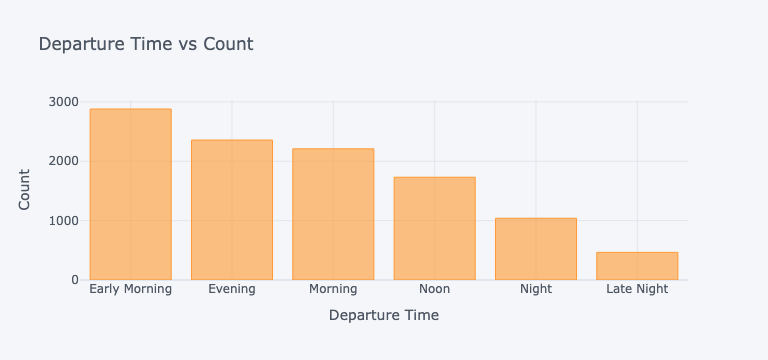

[CV 2/5] END max_depth=30, max_features=auto, min_samples_split=80, n_estimators=320;, score=nan total time=   0.0s
[CV 4/5] END max_depth=13, max_features=sqrt, min_samples_split=80, n_estimators=540;, score=0.719 total time=   4.5s
[CV 1/5] END max_depth=21, max_features=log, min_samples_split=25, n_estimators=320;, score=nan total time=   0.0s
[CV 3/5] END max_depth=21, max_features=log, min_samples_split=25, n_estimators=320;, score=nan total time=   0.0s
[CV 5/5] END max_depth=21, max_features=log, min_samples_split=25, n_estimators=320;, score=nan total time=   0.0s
[CV 2/5] END max_depth=30, max_features=log, min_samples_split=55, n_estimators=320;, score=nan total time=   0.0s
[CV 4/5] END max_depth=30, max_features=log, min_samples_split=55, n_estimators=320;, score=nan total time=   0.0s
[CV 1/5] END max_depth=30, max_features=sqrt, min_samples_split=10, n_estimators=760;, score=0.800 total time=   6.1s


In [119]:
df.dep_time_hour.apply(flight_dep_time).value_counts().iplot(kind='bar',title = 'Departure Time vs Count',
                                                             xTitle='Departure Time',yTitle='Count')

In [ ]:
df.dep_time_hour.iplot()

In [18]:
df.Duration

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680        3h
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [19]:
df = df.reset_index(drop=True)

In [20]:
def preprocess_duration(x):
    if 'h' not in x:
        x = '0h ' + x
    elif 'm' not in x:
        x = x +' 0m'
    return x

In [21]:
df.Duration = df.Duration.apply(preprocess_duration)

In [22]:
# df['duration_hour'] = [int(i.split('h')[0]) for i in df.Duration]
# df['duration_min'] = [int(i.split(' ')[-1].split('m')[0]) for i in df.Duration]

# The same code above can be done in this way also which is more general

df['duration_hour']=df.Duration.apply(lambda df: int(df.split(' ')[0][0:-1]))
df['duration_min']=df.Duration.apply(lambda df: int(df.split(' ')[1][0:-1]))

In [23]:
df[['Duration','duration_hour','duration_min']].head(25)

,Duration,duration_hour,duration_min
0,2h 50m,2,50
1,7h 25m,7,25
2,19h 0m,19,0
3,5h 25m,5,25
4,4h 45m,4,45
5,2h 25m,2,25
6,15h 30m,15,30
7,21h 5m,21,5
8,25h 30m,25,30
9,7h 50m,7,50


In [24]:
# df['total_duration_min1']=df.Duration.str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

## The code above is a very roundabout way to perform calculation, so instead just use the duration_hour 
## and duration_min to perform calculation, but if hadn't preprocessed the Duration feature and extracted 
## the features duration_hour and duration_min, then the above one will be used instead, as we won't need
## to pre-process the data now, our final goal is to get duration in minutes only

df['total_duration_min']=df.duration_hour*60+df.duration_min

df

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,dep_time_hour,dep_time_minute,arrival_time_hour,arrival_time_minute,duration_hour,duration_min,total_duration_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25,445
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0,1140
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25,325
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,9,4,2019,19,55,22,25,2,30,150
10678,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,2019,20,45,23,20,2,35,155
10679,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,3h 0m,non-stop,No info,7229,27,4,2019,8,20,11,20,3,0,180
10680,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,1,3,2019,11,30,14,10,2,40,160


#### Does total_duration_min impacts on Price?

<Axes: >

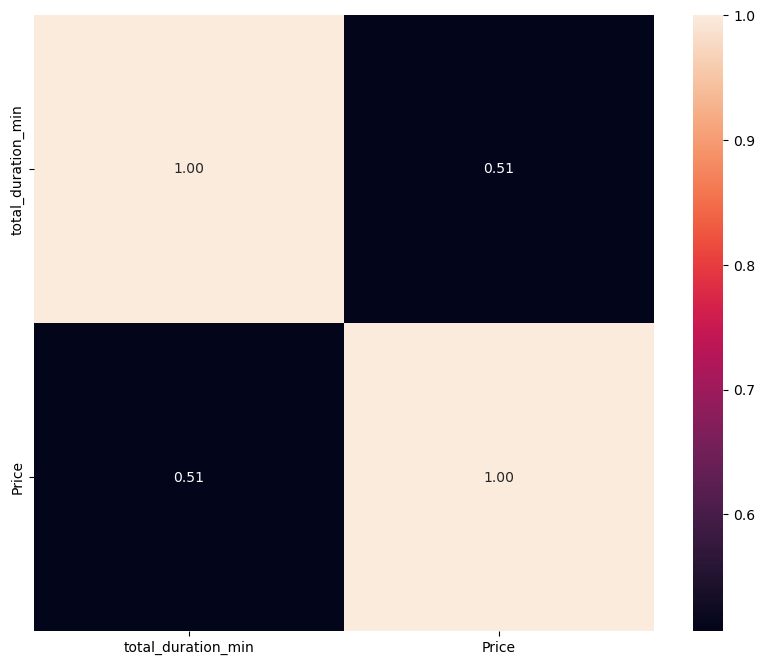

In [25]:
sns.heatmap(df[['total_duration_min','Price']].corr(numeric_only=True),annot=True,fmt='.2f')

In [26]:
# As it is corr is above 0.5, it affects the Price

<Axes: xlabel='total_duration_min', ylabel='Price'>

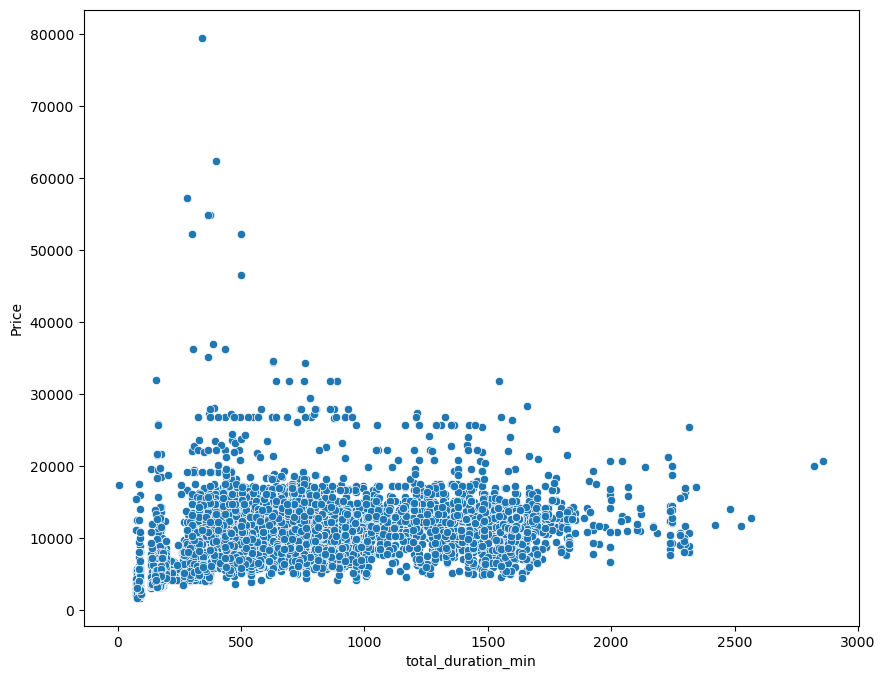

In [27]:
sns.scatterplot(x='total_duration_min',y='Price',data=df)

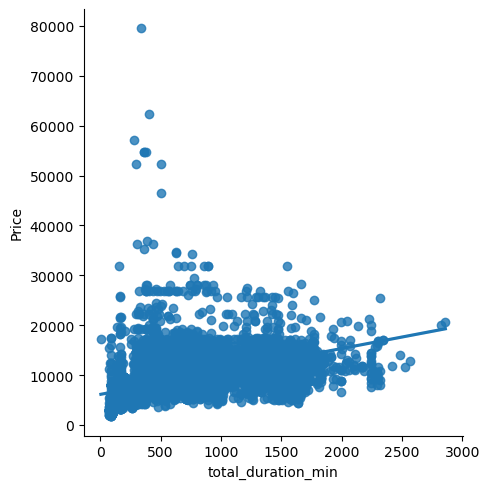

In [28]:
sns.lmplot(x='total_duration_min',y='Price',data=df)

<Axes: xlabel='total_duration_min', ylabel='Price'>

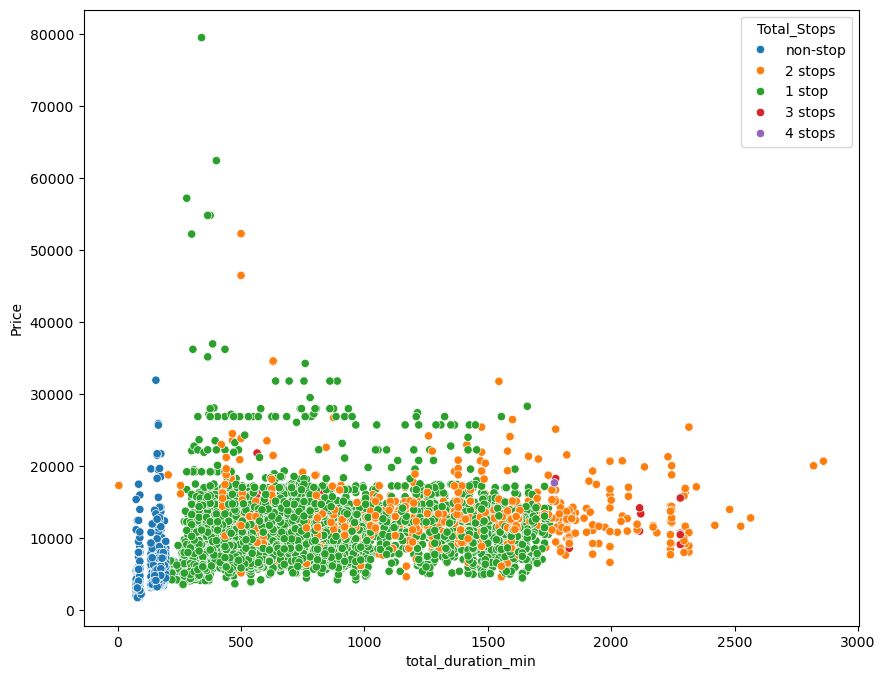

In [29]:
sns.scatterplot(x='total_duration_min',y='Price',data=df,hue='Total_Stops')

#### On which route Jet Airways is extremely used?

In [30]:
df[df.Airline=='Jet Airways'].Route.value_counts()

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
BOM → DED → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
Name: count, dtype: int64

#### Airline vs Price Analysis

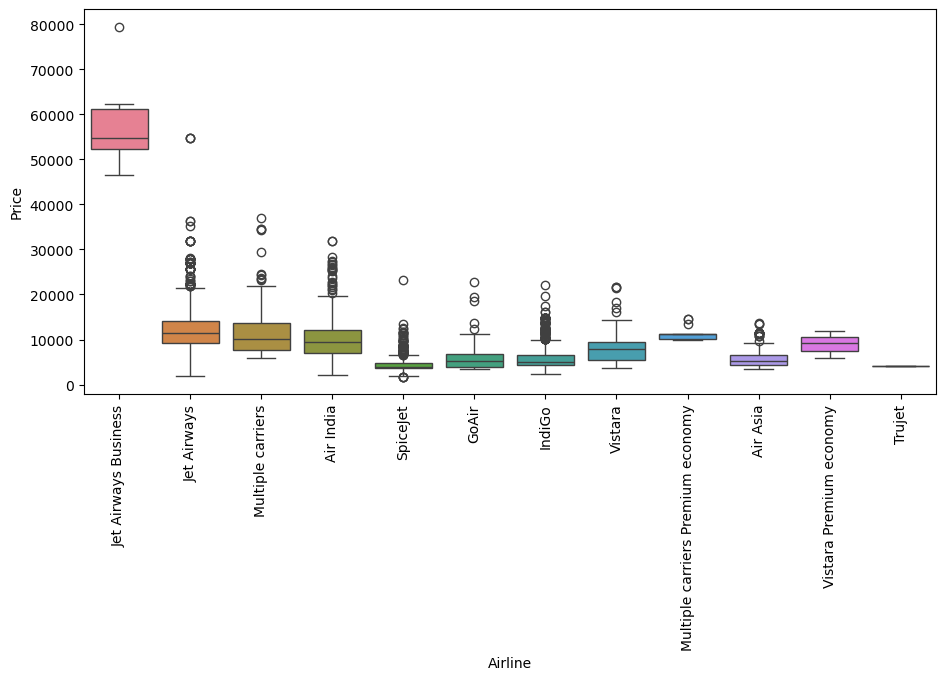

In [31]:
plt.figure(figsize=(11,5))
sns.boxplot(df.sort_values('Price',ascending=False),x='Airline',y='Price',hue='Airline')
plt.xticks(rotation=90)
plt.show()

In [32]:
cat_col = [col for col in df.columns if df[col].dtype=='O']
num_col = [col for col in df.columns if df[col].dtype!='O']

In [33]:
cat_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

### One-
Hot Encoding

In [34]:
pd.get_dummies(df.Source,dtype=int)

,Banglore,Chennai,Delhi,Kolkata,Mumbai
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,1,0,0,0,0
...,...,...,...,...,...
10677,0,0,0,1,0
10678,0,0,0,1,0
10679,1,0,0,0,0
10680,1,0,0,0,0


In [35]:
for cat in df.Source.unique():
    df[f'source_{cat.lower()}'] = df.Source.apply(lambda x: 1 if x == cat else 0)

In [36]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,...,arrival_time_hour,arrival_time_minute,duration_hour,duration_min,total_duration_min,source_banglore,source_kolkata,source_delhi,source_chennai,source_mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,4,25,19,0,1140,0,0,1,0,0
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,...,23,30,5,25,325,0,1,0,0,0
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,...,21,35,4,45,285,1,0,0,0,0


In [37]:
df.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

#### Perform target guided encoding on Data

In [38]:
df.groupby(['Airline'])['Price'].agg('mean').sort_values()

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9612.427756
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

In [39]:
airlines = df.groupby(['Airline'])['Price'].agg('mean').sort_values().index

In [40]:
# ls = []
# [ls.append([j,i]) for i,j in enumerate(airlines)]
# d = dict(ls)
# d

# The above code can be simplified by performing the code below

dict_airlines = {key:index for index, key in enumerate(airlines)}
dict_airlines

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [41]:
df.Airline = df.Airline.map(dict_airlines)

In [42]:
df.Airline

0         3
1         7
2        10
3         3
4         3
         ..
10677     2
10678     7
10679    10
10680     5
10681     7
Name: Airline, Length: 10682, dtype: int64

In [43]:
df.Destination

0        New Delhi
1         Banglore
2           Cochin
3         Banglore
4        New Delhi
           ...    
10677     Banglore
10678     Banglore
10679        Delhi
10680    New Delhi
10681       Cochin
Name: Destination, Length: 10682, dtype: object

In [44]:
df.Destination.replace('New Delhi','Delhi',inplace=True)

In [45]:
df.Destination.unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [46]:
dest = df.groupby(['Destination']).Price.agg('mean').sort_values().index

In [47]:
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [48]:
dict_dest = {key:index for index, key in enumerate(dest)}
dict_dest

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [49]:
df.Destination = df.Destination.map(dict_dest)

In [50]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,...,arrival_time_hour,arrival_time_minute,duration_hour,duration_min,total_duration_min,source_banglore,source_kolkata,source_delhi,source_chennai,source_mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,4,25,19,0,1140,0,0,1,0,0
3,3,2019-05-12,Kolkata,3,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,...,23,30,5,25,325,0,1,0,0,0
4,3,2019-03-01,Banglore,2,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,...,21,35,4,45,285,1,0,0,0,0


#### Perform Manual Encoding on Data

In [51]:
cat_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [52]:
df.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [53]:
# def label_encoding_total_stops(row):
#     if row == 'non-stop':
#         return 0
#     elif row == '1 stop':
#         return 1
#     elif row == '2 stops':
#         return 2
#     elif row == '3 stops':
#         return 3
#     elif row == '4 stops':
#         return 4

# df.Total_Stops.apply(label_encoding_total_stops)

In [54]:
dict_stops = {'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4}
df.Total_Stops = df.Total_Stops.map(dict_stops)

In [55]:
df.Total_Stops

0        0
1        2
2        2
3        1
4        1
        ..
10677    0
10678    0
10679    0
10680    0
10681    2
Name: Total_Stops, Length: 10682, dtype: int64

#### Remove Unnecessary Features

In [56]:
df.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,...,arrival_time_hour,arrival_time_minute,duration_hour,duration_min,total_duration_min,source_banglore,source_kolkata,source_delhi,source_chennai,source_mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,0,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0


In [57]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'journey_day',
       'journey_month', 'journey_year', 'dep_time_hour', 'dep_time_minute',
       'arrival_time_hour', 'arrival_time_minute', 'duration_hour',
       'duration_min', 'total_duration_min', 'source_banglore',
       'source_kolkata', 'source_delhi', 'source_chennai', 'source_mumbai'],
      dtype='object')

In [58]:
df.Additional_Info.value_counts()/df.shape[0]*100

Additional_Info
No info                         78.112713
In-flight meal not included     18.554578
No check-in baggage included     2.995694
1 Long layover                   0.177869
Change airports                  0.065531
Business class                   0.037446
No Info                          0.028085
1 Short layover                  0.009362
Red-eye flight                   0.009362
2 Long layover                   0.009362
Name: count, dtype: float64

In [59]:
df.journey_year.unique()

array([2019], dtype=int32)

In [60]:
df.drop(['Additional_Info','Date_of_Journey','Route','Duration','total_duration_min','Source','journey_year'],axis=1,inplace=True)

In [61]:
df.head(3)

,Airline,Destination,Total_Stops,Price,journey_day,journey_month,dep_time_hour,dep_time_minute,arrival_time_hour,arrival_time_minute,duration_hour,duration_min,source_banglore,source_kolkata,source_delhi,source_chennai,source_mumbai
0,3,2,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662,1,5,5,50,13,15,7,25,0,1,0,0,0
2,10,4,2,13882,9,6,9,25,4,25,19,0,0,0,1,0,0


#### Perform Outlier Detection

In [62]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Airline,10682.0,6.674967,3.192209,0.0,3.0,7.0,10.0,11.0
Destination,10682.0,2.981464,1.100949,0.0,2.0,3.0,4.0,4.0
Total_Stops,10682.0,0.824190,0.675229,0.0,0.0,1.0,1.0,4.0
Price,10682.0,9087.214567,4611.548810,1759.0,5277.0,8372.0,12373.0,79512.0
journey_day,10682.0,13.509081,8.479363,1.0,6.0,12.0,21.0,27.0
journey_month,10682.0,4.708575,1.164408,3.0,3.0,5.0,6.0,6.0
dep_time_hour,10682.0,12.491013,5.748820,0.0,8.0,11.0,18.0,23.0
dep_time_minute,10682.0,24.409287,18.767801,0.0,5.0,25.0,40.0,55.0
arrival_time_hour,10682.0,13.349186,6.859317,0.0,8.0,14.0,19.0,23.0
arrival_time_minute,10682.0,24.690601,16.506808,0.0,10.0,25.0,35.0,55.0


In [63]:
def plot(df,col):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1)

    sns.distplot(df[col],ax=ax1)
    sns.boxplot(x= df[col],ax=ax2)
    sns.distplot(df[col],ax=ax3,kde=False)

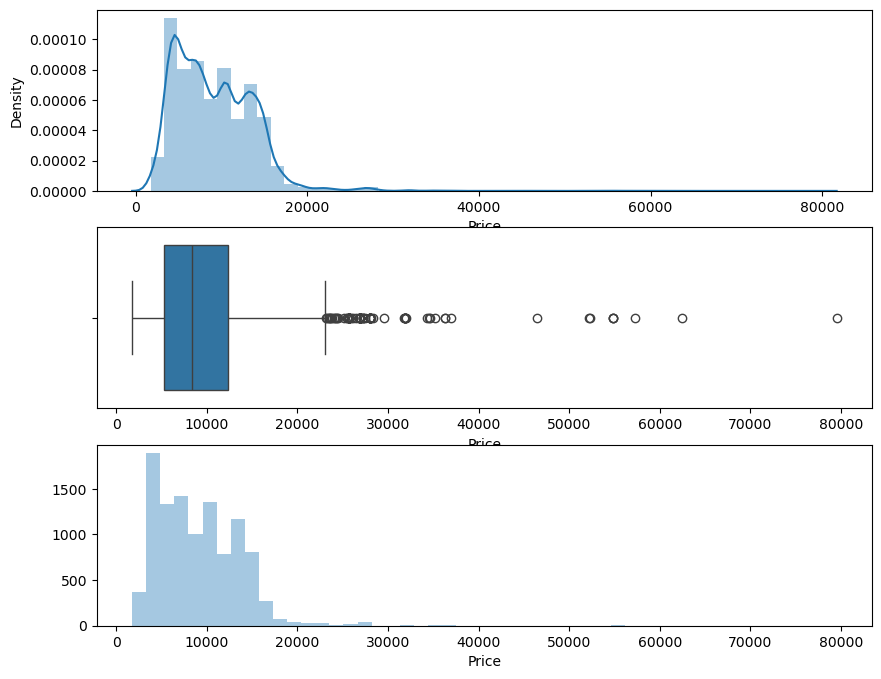

In [64]:
plot(df,'Price')

In [65]:
q1 = df.Price.quantile(.25)
q3 = df.Price.quantile(.75)

iqr = q3-q1

max = q3 + 1.5*iqr
min = q1 - 1.5*iqr

In [66]:
print(max,min)

23017.0 -5367.0


In [67]:
print([price for price in df.Price if price > max or price < min])

[27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]


In [68]:
len([price for price in df.Price if price > max or price < min])

94

In [69]:
df.Price.median()

8372.0

In [70]:
# Let's assume that I talk to domain expertise about what should be treated as outliers, and the domain 
# expertise says that any price above 35000 should be treated as outlier and replace them with the median

In [71]:
df.Price = np.where(df.Price>35000, df.Price.median(), df.Price)

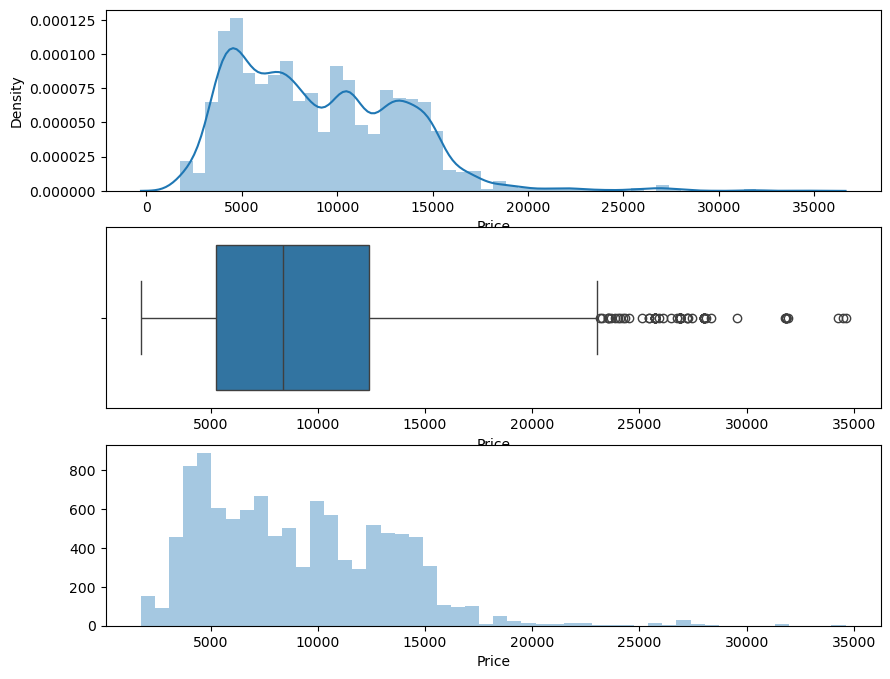

In [72]:
plot(df,'Price')

### Feature Selection

In [73]:
x = df.drop(['Price'],axis=1)
y = df.Price

In [74]:
from sklearn.feature_selection import  mutual_info_regression

In [75]:
imp = mutual_info_regression(x,y)

In [76]:
imp

array([1.31852104, 1.06959635, 0.79495733, 0.37993495, 0.63749079,
       0.92038816, 0.76197273, 1.14256224, 0.90114757, 1.11998762,
       0.67059503, 0.38772602, 0.45188456, 0.5186116 , 0.14662706,
       0.20761833])

In [77]:
imp_df = pd.DataFrame(imp,index = x.columns)
imp_df.columns = ['importance']
imp_df = imp_df.sort_values('importance',ascending=False)
imp_df

,importance
Airline,1.318521
arrival_time_hour,1.142562
duration_hour,1.119988
Destination,1.069596
dep_time_hour,0.920388
arrival_time_minute,0.901148
Total_Stops,0.794957
dep_time_minute,0.761973
duration_min,0.670595
journey_month,0.637491


### ML Model

In [78]:
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score

In [79]:
x_train,x_test,y_train,y_test = tts(x,y,test_size=.25,random_state=0)

In [80]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((8011, 16), (2671, 16), (8011,), (2671,))

In [81]:
from sklearn.ensemble import RandomForestRegressor

In [82]:
rf = RandomForestRegressor()

In [83]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [84]:
pred = rf.predict(x_test)

In [85]:
pred

array([12867.8585,  5983.19  ,  3558.66  , ...,  7729.85  ,  6550.426 ,
        6647.91  ])

In [86]:
r2_score(y_test,pred)

0.8034497139519353

### Saving Model

In [87]:
import pickle

In [88]:
file = open('rf_random.pkl','wb')

In [89]:
pickle.dump(rf, file)

In [90]:
model = open('rf_random.pkl','rb')

In [91]:
forest = pickle.load(model)

In [92]:
y_pred = forest.predict(x_test)

In [93]:
r2_score(y_test, y_pred)

0.8034497139519353

### Define your own Evaluation Metrics

In [94]:
# MAPE - Mean Absolute Percentage Error

In [95]:
def mape(y_true,y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred)/y_true))*100

In [96]:
mape(y_test,y_pred)

13.63157763933654

### Automate ML Pipeline

In [97]:
from sklearn import metrics as m

In [98]:
def predict(model):
    model = model.fit(x_train,y_train)
    print(f'Training score: {model.score(x_train, y_train)}')
    y_prediction = model.predict(x_test)
    print(f'Predictions: {y_prediction}\n')
    print(f'r2 score: {m.r2_score(y_test, y_prediction)}')
    print(f'MAE: {m.mean_absolute_error(y_test,y_prediction)}')
    print(f'MSE: {m.mean_squared_error(y_test,y_prediction)}')
    print(f'RMSE: {np.sqrt(m.mean_squared_error(y_test,y_prediction))}')
    print(f'MAPE: {mape(y_test,y_prediction)}')
    sns.distplot(y_test-y_prediction)

Training score: 0.9539713773075716
Predictions: [12457.6675      5896.76        3558.705      ...  7727.19
  6683.44666667  6484.52      ]

r2 score: 0.8044111496571832
MAE: 1218.3439745010076
MSE: 3810857.9303959324
RMSE: 1952.141882752361
MAPE: 13.603123608586914


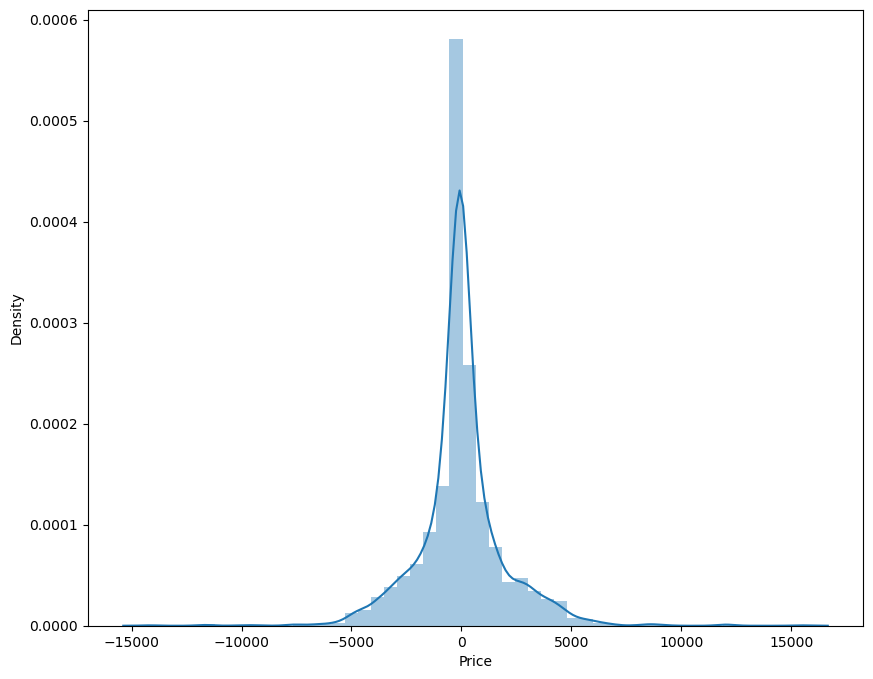

In [99]:
predict(RandomForestRegressor())

In [100]:
from sklearn.tree import DecisionTreeRegressor

Training score: 0.9697871858113424
Predictions: [11263.5  5636.   3543.  ...  7575.   7229.   6686. ]

r2 score: 0.7214859676034913
MAE: 1332.7810682640709
MSE: 5426574.200034736
RMSE: 2329.5008478287223
MAPE: 14.681258761218501


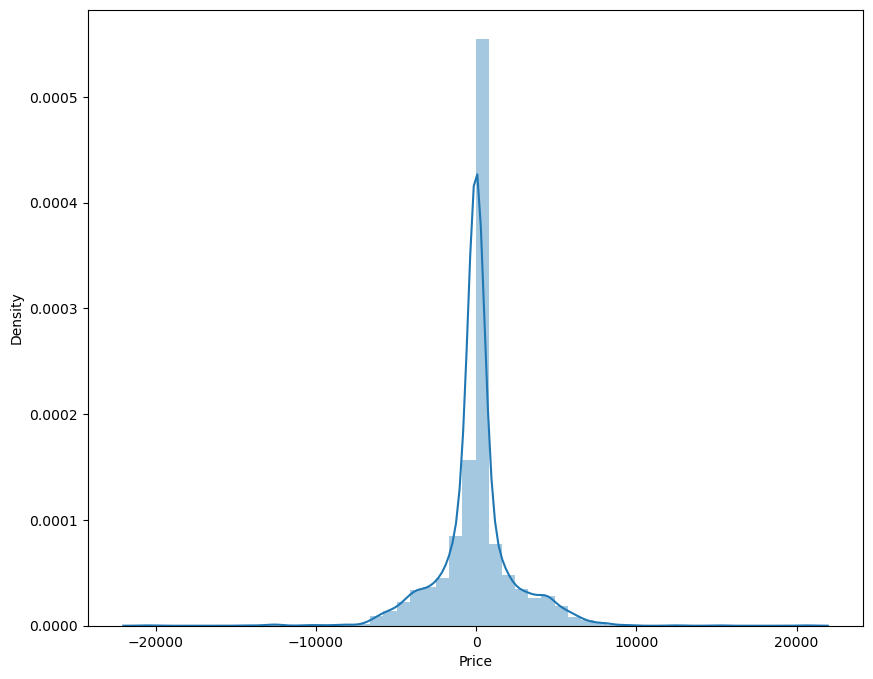

In [101]:
predict(DecisionTreeRegressor())

In [102]:
import sklearn

Training score: 0.5928918207465157
Predictions: [11096.66693871  6756.20545335  2054.75307488 ...  9798.83506742
  9450.77838423  7873.65232989]

r2 score: 0.5810678933680298
MAE: 2039.6881762366054
MSE: 8162483.383166686
RMSE: 2857.006017348701
MAPE: 25.044882831788


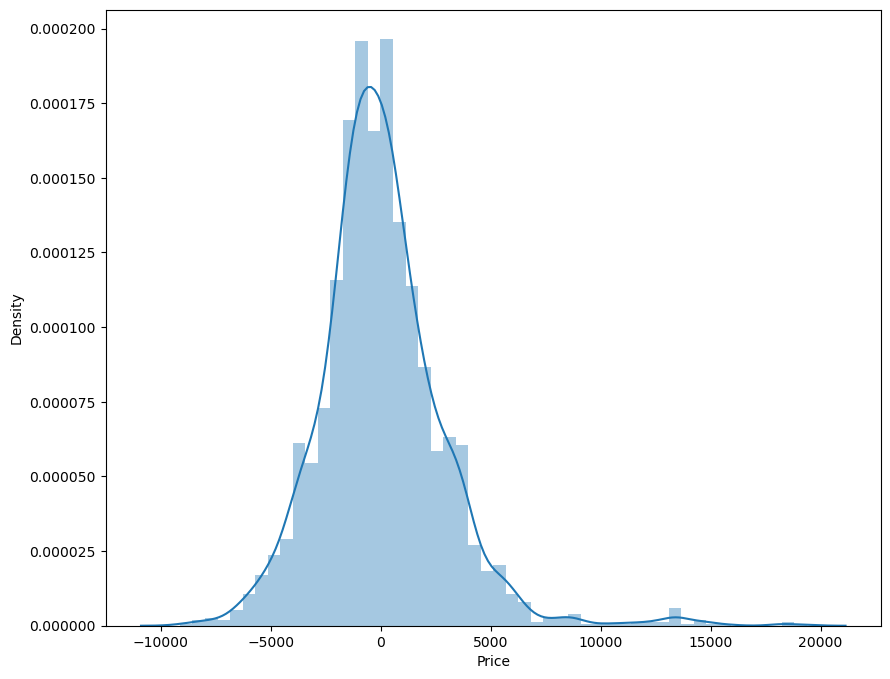

In [103]:
predict(sklearn.linear_model.LinearRegression())

Training score: 0.9465521349688982
Predictions: [12695.91666667  5656.6         3543.         ...  7719.6
  7229.          6455.4       ]

r2 score: 0.7934240153462541
MAE: 1250.6302975508413
MSE: 4024931.523280913
RMSE: 2006.223198769497
MAPE: 13.871549695047266


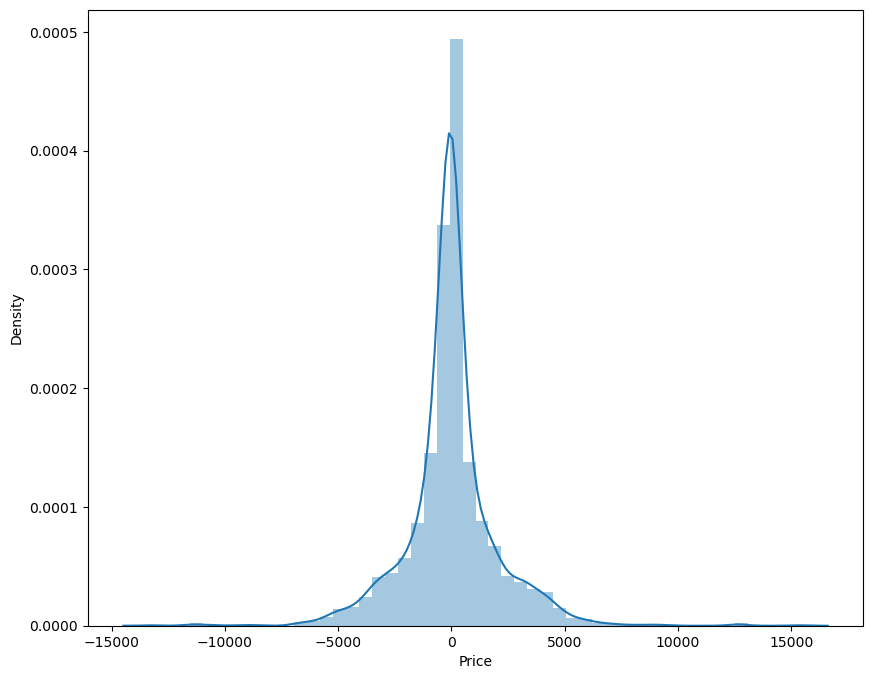

In [104]:
predict(sklearn.ensemble.BaggingRegressor())

Training score: 0.8749647099021691
Predictions: [12776.63789853  6505.29855154  4188.00724315 ...  9085.69338714
  6372.77102064  7618.6623917 ]

r2 score: 0.8331594849894657
MAE: 1248.7016267284716
MSE: 3250724.6636238876
RMSE: 1802.9766120568197
MAPE: 14.479780491864375


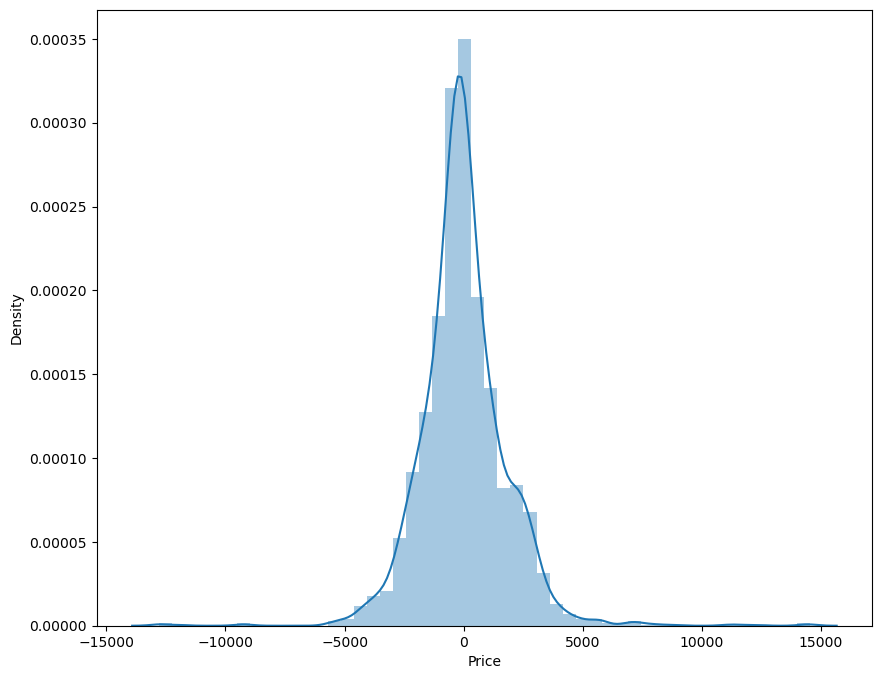

In [105]:
predict(sklearn.ensemble.HistGradientBoostingRegressor())

### Hypertuning/Hyperparameter Tuning ML Model

In [106]:
from sklearn.model_selection import RandomizedSearchCV as rscv

In [107]:
reg_rf = RandomForestRegressor()

In [108]:
[int(x) for x in np.linspace(100,1200,6)]

[100, 320, 540, 760, 980, 1200]

In [109]:
n_estimators = [int(x) for x in np.linspace(100,1200,6)]

max_features = ['auto','sqrt','log']

max_depth = [int(x) for x in np.linspace(5,50,)]

min_samples_split = [int(x) for x in np.linspace(5,100,20)]

In [110]:
random_grid = {'n_estimators':n_estimators,
               'max_features':max_features,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split}

In [111]:
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt', 'log'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5,
  10,
  15,
  20,
  25,
  30,
  35,
  40,
  45,
  50,
  55,
  60,
  65,
  70,
  75,
  80,
  85,
  90,
  95,
  100]}

In [112]:
rf_random = rscv(estimator=reg_rf,param_distributions=random_grid,cv=5,n_jobs=-1,verbose=5)

In [114]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt', 'log'],
                                        'min_samples_split': [5, 10, 15, 20, 25,
                                                              30, 35, 40, 45,
                                                              50, 55, 60, 65,
                                                              70, 75, 80, 85,
                                                              90, 95, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=5)

In [115]:
rf_random.best_params_

{'n_estimators': 760,
 'min_samples_split': 10,
 'max_features': 'sqrt',
 'max_depth': 30}

In [116]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=30, max_features='sqrt', min_samples_split=10,
                      n_estimators=760)

In [117]:
rf_random.best_score_

0.8153729259894563

[CV 3/5] END max_depth=30, max_features=log, min_samples_split=50, n_estimators=980;, score=nan total time=   0.0s
[CV 2/5] END max_depth=13, max_features=log, min_samples_split=55, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END max_depth=13, max_features=log, min_samples_split=55, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END max_depth=30, max_features=log, min_samples_split=90, n_estimators=980;, score=nan total time=   0.0s
[CV 1/5] END max_depth=21, max_features=log, min_samples_split=90, n_estimators=540;, score=nan total time=   0.0s
[CV 3/5] END max_depth=21, max_features=log, min_samples_split=90, n_estimators=540;, score=nan total time=   0.0s
[CV 5/5] END max_depth=21, max_features=log, min_samples_split=90, n_estimators=540;, score=nan total time=   0.0s
[CV 2/5] END max_depth=30, max_features=log, min_samples_split=40, n_estimators=320;, score=nan total time=   0.0s
[CV 4/5] END max_depth=30, max_features=log, min_samples_split=40, n_estimators=